In [2]:
import sys, os
import argparse

import numpy as np
import pandas as pd
import uproot
import csv, yaml

import h5py
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# 1609 1621 1623 1625
# 1626 1633 1634 1636 1637
# 1672 1674 1678 1679 1683
# 1684 1686 1689 1692 1717
# 1718 1722 1724 1725 1726
# 1728 1729 1732 1749 1769
# 1785 1787 1790 1799 1807
# 1810 1814 1815 1817 1818
# 1819 1826 1828 1830 1831
# 1836 1837 1839 1843 1850
# 1853 1864 1867 1868 1874
# 1878 1879 1909 1910 1914
# 1916 1917 1920 1922 1923
# 1924 1932 1936 1937 1940
# 1942 1944 1948 1950 1952


In [3]:
# runnum = os.listdir('/store/hep/users/yewzzang/JSNS2/com_data')

In [4]:
# path = '/store/hep/users/yewzzang/JSNS2/com_data/'
# FN = '/FN_cut_Rho_1.6_ZL_1.0'
# ME = '/ME_cut_Rho_1.6_ZL_1.0'

In [5]:
# exist = []
# nofile = []
# runs = []
# for i in range(len(runnum)):
    
#     if os.path.exists(path+runnum[i]+FN):
#         exist.append(len(os.listdir(path+runnum[i]+FN)))
#         runs.append(runnum[i][3:])
#     else:
#         nofile.append(runnum[i])

In [28]:
# runss =[ 
#     '1596','1597', '1598', '1599', '1600', 
#     '1606', '1608', '1609', '1614', '1621', 
#     '1623', '1624', '1625', '1626', '1627', 
#     '1628', '1629',  '1630', '1631', '1632', 
#     '1633', '1634', '1635', '1636', '1637',    
#     '1638', '1639', '1640', '1641', '1642', 
#     '1644', '1645', '1646',  '1647', '1649', 
#     '1650', '1651', '1652', '1653', '1654', 
#     '1655', '1656', '1658', '1659', '1660', 
#     '1661', '1662', '1663', '1664',  '1665', 
#     '1666', '1667', '1668', '1669', '1671', 
#     '1672', '1673',   '1674', '1675', '1676', 
#     '1677', '1678', '1679', '1680', '1681',  
#     '1682', '1683', '1684', '1685', '1686', 
#     '1687', '1689', '1692','1693', '1711', 
#     '1716', '1717', '1718', '1719', '1722', 
#     '1724','1725', '1726', '1727', '1728', 
#     '1729', '1732', '1749', '1750','1759', 
#     '1760', '1761', '1762', '1763', '1766', 
#     '1768', '1769','1770', '1784', '1785', 
#     '1787', '1789', '1790', '1795', '1796',
#     '1797', '1798', '1799', '1807', '1809', 
#     '1810', '1811', '1812','1813', '1814', 
#     '1815', '1817', '1818', '1819', '1821',  
#     '1826', '1828', '1829', '1830', '1831', 
#     '1833', '1835','1836', '1837', '1838', 
#     '1839', '1843', '1849', '1850', '1851', 
#     '1852', '1853', '1854', '1864', '1865', 
#     '1867', '1868','1870', '1872', '1873', 
#     '1874', '1875', '1876', '1877', '1878',
#     '1879', '1880', '1891', '1909', '1910', 
#     '1911', '1912', '1913','1914', '1915', 
#     '1916', '1917', '1918', '1919', '1920', 
#     '1921','1922', '1923', '1924', '1925', 
#     '1926', '1928', '1930', '1932', '1933', 
#     '1934', '1935', '1936', '1937', '1939', 
#     '1940', '1941', '1942', '1943', '1944', 
#     '1945', '1948', '1949', '1950', '1952']

In [1]:
runss =[ 
    '1596','1597', '1598', '1599', '1600', 
    '1606', '1608', '1609', '1614', '1621', 
    '1623', '1624', '1625', '1626', '1627', 
    '1628', '1629',  '1630', '1631', '1632', 
    '1633', '1634', '1635', '1636', '1637',    
    '1638', '1639', '1640', '1641', '1642', 
    '1644', '1645', '1646',  '1647', '1649', 
    '1650', '1651', '1652', '1653', '1654', 
    '1655', '1656', '1658', '1659', '1660', 
    '1661', '1662', '1663', '1664',  '1665', 
    '1666', '1667', '1668', '1669', '1671', 
    '1672', '1673',   '1674', '1675', '1676', 
    '1677', '1678', '1679', '1680', '1681',  
    '1682', '1683', '1684', '1685', '1686', 
    '1687', '1689', '1692','1693', '1711', 
    '1716', '1717', '1718', '1719', '1722', 
    '1724','1725', '1726', '1727', '1728', 
    '1729', '1732', '1749', '1750','1759', 
    '1760', '1761', '1762', '1763', '1766', 
    '1768', '1769','1770', '1784', '1785', 
    '1787', '1789', '1790', '1795', '1796',
    '1797', '1798', '1799', '1807', '1809', 
    '1810', '1811', '1812','1813', '1814', 
    '1815', '1817', '1818', '1819', '1821',  
    '1826', '1828', '1829', '1830', '1831', 
    '1833', '1835','1836', '1837', '1838', 
    '1839', '1843', '1849', '1850', '1851', 
    '1852', '1853', '1854', '1864', '1909', '1910', 
    '1911', '1912', '1913','1914', '1915', 
    '1916', '1917', '1918', '1919', '1920', 
    '1921','1922', '1923', '1924', '1925', 
    '1926', '1928', '1930', '1932', '1933', 
    '1934', '1935', '1936', '1937', '1939', 
    '1940', '1941', '1942', '1943', '1944', 
    '1945', '1948', '1949', '1950', '1952']

In [8]:
# runss =[ 
#     '1596','1597', '1598', '1599', '1600', 
#     '1606', '1608', '1609', '1614', '1621', 
#     '1623', '1624', '1625', '1626', '1627', 
#     '1628', '1629',  '1630', '1631', '1632', 
#     '1633', '1634', '1635', '1636', '1637',    
#     '1638', '1639', '1640', '1641', '1642', 
#     '1644', '1645', '1646',  '1647', '1649', 
#     '1650', '1651', '1652', '1653', '1654', 
#     '1655', '1656', '1658', '1659', '1660', 
#     '1661', '1662', '1663', '1664',  '1665', 
#     '1666', '1667', '1668', '1669', '1671', 
#     '1672', '1673',   '1674', '1675', '1676', 
#     '1677', '1678', '1679', '1680', '1681',  
#     '1682', '1683', '1684', '1685', '1686', 
#     '1687', '1689', '1692','1693', '1711', 
#     '1716', '1717', '1718', '1719', '1722', 
#     '1724','1725', '1726', '1727', '1728', 
#     '1729', '1732', '1749', '1750','1759', 
#     '1760', '1761', '1762', '1763', '1766', 
#     '1768', '1769','1770', '1784', '1785', 
#     '1787', '1789', '1790', '1795', '1796',
#     '1797', '1798', '1799', '1807', '1809', 
#     '1917', '1918', '1919', '1920', 
#     '1921','1922', '1923', '1924', '1925', 
#     '1926', '1928', '1930', '1932', '1933', 
#     '1934', '1935', '1936', '1937', '1939', 
#     '1940', '1941', '1942', '1943', '1944', 
#     '1945', '1948', '1949', '1950', '1952']

In [9]:
# runss =[ 
#     '1596','1597', '1598', '1599', '1600', 
#     '1606', '1608', '1609', '1614', '1621', 
#     '1623', '1624', '1625', '1626', '1627', 
#     '1628', '1629',  '1630', '1631', '1632', 
#     '1633', '1634', '1635', '1636', '1637',    
#     '1638', '1639', '1640', '1641', '1642', 
#     '1644', '1645', '1646',  '1647',  
#     '1650', '1651', '1652',  '1654', 
#     '1655',  '1658', '1659', '1660', 
#     '1661', '1662',  '1664',  '1665', 
#     '1666',  '1668',  '1671', 
#     '1672', '1673',   '1674', '1675', '1676', 
#      '1678', '1679', '1680', '1681',  
#     '1682', '1683', '1684',  '1686', 
#     '1687', '1689', '1692', '1711', 
#     '1716', '1717', '1718', '1719', '1722', 
#     '1724','1725', '1726', '1727', '1728', 
#     '1729', '1732', '1749', '1750','1759', 
#     '1760', '1761', '1762', '1763', '1766', 
#      '1769', '1784', '1785', 
#     '1787', '1789', '1790', '1795', '1796',
#     '1797',  '1799', '1807', '1809', 
#      '1811',   
#     '1815', '1817', '1818', '1819', '1821',  
#     '1826', '1828', '1829', '1830', '1831', 
#     '1833', '1835','1836', '1837', '1838', 
#     '1839', '1843', '1849', '1850', '1851', 
#     '1852', '1853', '1854', '1864', '1865', 
#     '1867', '1868','1870', '1872',  
#     '1875', '1876', 
#     '1879',  '1891', '1909', '1910', 
#     '1911', '1912', '1913','1914', '1915', 
#     '1916', '1917', '1918', '1919', '1920', 
#     '1921','1922', '1923', '1924', '1925', 
#     '1926', '1928',  '1932', '1933', 
#     '1934', '1935', '1936', '1937', '1939', 
#     '1940', '1941', '1942', '1943', '1944', 
#     '1945', '1948', '1949', '1950', '1952']

In [3]:
len(runss)


176

In [4]:
run_num = []
FN_num = []
ME_num = []
FN_rej = []
ME_eff = []
AUC = []

for j in runss:

    if os.path.exists('result/data20220505_noDIN_eval_'+str(j)+'_model_r01592_R14_Z10_nolog/data20220505_noDIN_eval_'+str(j)+'_model_r01592_R14_Z10_nolog_information.txt') == True:
        f = open('result/data20220505_noDIN_eval_'+str(j)+'_model_r01592_R14_Z10_nolog/data20220505_noDIN_eval_'+str(j)+'_model_r01592_R14_Z10_nolog_information.txt', 'r')
        lines = f.readlines()
    #     for line in lines:
    #         print(line)
        run_num.append(j)
#         print(lines)
#         print(float(lines[-2].split(' ')[-2]))
#         print(float(lines[-2].split(' ')[-1][:-1]))
#         print(j)
        FN_num.append(float(lines[-2].split(' ')[-2]))        #### FN num
        ME_num.append(float(lines[-2].split(' ')[-1][:-1]))   #### ME num
        ME_eff.append(float(lines[0].split(' ')[-1][:-2])*100)  #### ME effi
        FN_rej.append((1-float(lines[1].split(' ')[-1][:-2]))*100)    #### FN rej
        AUC.append(float(lines[-1][:-2]))                       #### AUC
        f.close()
    if os.path.exists('result/data20220505_noDIN_eval_'+str(j)+'_model_r01592_R14_Z10_nolog/data20220505_noDIN_eval_'+str(j)+'_model_r01592_R14_Z10_nolog_information.txt') == False:
        print(j)

In [23]:
AUC200 = []
for i in range(len(AUC)):
    
    print(run_num[i],AUC[i],FN_num[i])
#         AUC200.append(AUC)

1596 0.998203054806828 18.0
1597 0.980760058223112 580.0
1598 0.988533977666287 187.0
1599 0.991861380939879 13.0
1600 0.987535442461244 988.0
1606 0.979245861682122 117.0
1608 0.980515540683403 242.0
1609 0.9806484496834 2160.0
1614 0.997958141909137 21.0
1621 0.980655043876061 365.0
1623 0.975690381133145 495.0
1624 0.972623966942148 44.0
1625 0.981490315830284 4378.0
1626 0.980548063850417 874.0
1627 0.988372093023255 4.0
1628 0.985359978518691 338.0
1629 0.985809833694866 24.0
1630 0.990212341005272 163.0
1631 0.996440919259711 22.0
1632 0.984919896965508 275.0
1633 0.980626624602528 572.0
1634 0.984753834168397 334.0
1635 0.985715608441903 164.0
1636 0.987596291710929 371.0
1637 0.983250537479931 363.0
1638 0.995849434664376 17.0
1639 0.986713520749665 36.0
1640 0.992962103634957 30.0
1641 0.983641131375342 139.0
1642 0.981572170981787 106.0
1644 0.981560826499444 157.0
1645 0.987276154571159 62.0
1646 0.996714872999559 56.0
1647 0.989947089947 15.0
1649 0.954908990623276 49.0
165

In [13]:
AUC200b = []
for i in range(len(AUC)):
    if (FN_num[i] < 200):
        print(run_num[i],AUC[i],FN_num[i])
        AUC200b.append(AUC)

1596 0.998203054806828 18.0
1598 0.988533977666287 187.0
1599 0.991861380939879 13.0
1606 0.979245861682122 117.0
1614 0.997958141909137 21.0
1624 0.972623966942148 44.0
1627 0.988372093023255 4.0
1629 0.985809833694866 24.0
1630 0.990212341005272 163.0
1631 0.996440919259711 22.0
1635 0.985715608441903 164.0
1638 0.995849434664376 17.0
1639 0.986713520749665 36.0
1640 0.992962103634957 30.0
1641 0.983641131375342 139.0
1642 0.981572170981787 106.0
1644 0.981560826499444 157.0
1645 0.987276154571159 62.0
1646 0.996714872999559 56.0
1647 0.989947089947 15.0
1649 0.954908990623276 49.0
1650 0.998087954110898 27.0
1651 0.979517301736905 56.0
1652 0.987454145267791 70.0
1653 0.96878695377169 51.0
1654 1.0 1.0
1655 0.98816984042687 105.0
1656 0.806223479490806 7.0
1658 0.98441247002398 6.0
1659 0.990654205607476 4.0
1660 1.0 3.0
1661 0.988378684807256 9.0
1662 0.995967741935483 8.0
1663 0.958726415094339 8.0
1664 0.996610169491525 5.0
1665 0.995577667219458 9.0
1666 0.97293447293447 9.0
166

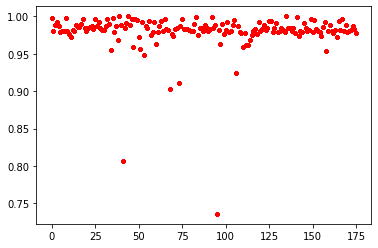

In [22]:
plt.plot(np.array(AUC200).T,'g.')
plt.plot(np.array(AUC200b).T,'r.')
plt.show()

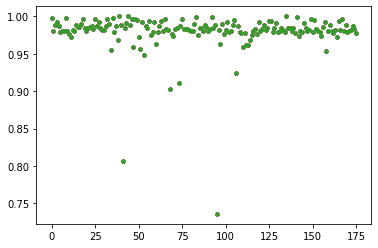

In [20]:
plt.plot(np.array(AUC200b).T,'.')
plt.show()

In [ ]:
# run_num = []
# FN_num = []
# ME_num = []
# FN_rej = []
# ME_eff = []
# AUC = []

# for j in runss:

#     if os.path.exists('result/eval_'+str(j)+'_model_r01592_R14_Z10_nolog/eval_'+str(j)+'_model_r01592_R14_Z10_nolog_information.txt') == True:
#         f = open('result/eval_'+str(j)+'_model_r01592_R14_Z10_nolog/eval_'+str(j)+'_model_r01592_R14_Z10_nolog_information.txt', 'r')
#         lines = f.readlines()
#     #     for line in lines:
#     #         print(line)
#         run_num.append(j)
# #         print(lines)
# #         print(float(lines[-2].split(' ')[-2]))
# #         print(float(lines[-2].split(' ')[-1][:-1]))
# #         print(j)
#         FN_num.append(float(lines[-2].split(' ')[-2]))        #### FN num
#         ME_num.append(float(lines[-2].split(' ')[-1][:-1]))   #### ME num
#         ME_eff.append(float(lines[0].split(' ')[-1][:-2])*100)  #### ME effi
#         FN_rej.append((1-float(lines[1].split(' ')[-1][:-2]))*100)    #### FN rej
#         AUC.append(float(lines[-1][:-2]))                       #### AUC
#         f.close()
    

In [14]:
a = 0
c = 0
sets = []
setss = []
for i in range(len(np.array(FN_num))):
    
    b = np.array(FN_num)[i]
    a = a + b
    sets.append(np.int(np.array(runss)[i]))
#     print(sets[0])
    if a > 8000:
        print(a,i, np.array(runss)[i])
        c = c+1
        a = 0
        print(c,'c')
        
        setss.append(sets)
        sets = []
        

9608.0 12 1625
1 c
9730.0 61 1678
2 c
10865.0 71 1689
3 c
8489.0 77 1718
4 c
10190.0 87 1749
5 c
8320.0 114 1814
6 c
8157.0 121 1828
7 c
8299.0 130 1839
8 c
9393.0 138 1864
9 c
9939.0 146 1916
10 c
8489.0 163 1936
11 c
8703.0 175 1952
12 c


In [27]:
setss[11]

[1937, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1948, 1949, 1950, 1952]

In [ ]:


infos = []
sis = []

preds = []
labels = []
dVertexs = []
dTs = []
vertexXs = []
vertexYs = []
vertexZs = []

result_output = 'date20220508_eval_0005'

for i in setss[5]:
    result_input = 'data20220505_noDIN_eval_'+str(i) +'_model_r01592_R14_Z10_nolog'
    print(result_input)

    si_path = 'result/' + result_input + '/sampleInfo_eval.csv'
    fPred = 'result/' + result_input + '/' + result_input + '.csv'
    si = pd.read_csv(si_path)
    info = pd.read_csv(fPred)

    info_numpy = np.array(info)
    si_numpy = np.array(si)


    for i in range(len(info_numpy)):

        label = info_numpy[i][0]
        pred = info_numpy[i][1]

        fileidx = info_numpy[i][4]

        filename = si_numpy[int(fileidx)][2]


        idx = info_numpy[i][5]


        data = h5py.File(filename,'r')

        dT = data['events']['dT'][idx]
        dVertex = data['events']['dVertex'][idx]
        vertexX = data['events']['vertexX'][idx]
        vertexY = data['events']['vertexY'][idx]
        vertexZ = data['events']['vertexZ'][idx]


        preds.append(pred)
        labels.append(label)
        dVertexs.append(dVertex)
        dTs.append(dT)
    #     print(dTs.type)
        vertexXs.append(vertexX)
        vertexYs.append(vertexY)
        vertexZs.append(vertexZ)





preds = np.array(preds)
labels = np.array(labels)
dVertexs = np.array(dVertexs)
dTs = np.array(dTs)
vertexXs = np.array(vertexXs)
vertexYs = np.array(vertexYs)
vertexZs = np.array(vertexZs)


ME_label = []
ME_dVertex = []
ME_dT = []
ME_vertexX = []
ME_vertexY = []
ME_vertexZ = []
ME_pred = []


FN_label = []
FN_dVertex = []
FN_dT = []
FN_vertexX = []
FN_vertexY = []
FN_vertexZ = []
FN_pred = []

for i in range(len(preds)):
    if labels[i] == 1:
        ME_label.append(labels[i])
        ME_dVertex.append(dVertexs[i])
        ME_dT.append(dTs[i])
        ME_vertexX.append(vertexXs[i])
        ME_vertexY.append(vertexYs[i])
        ME_vertexZ.append(vertexZs[i])
        ME_pred.append(preds[i])
    else:

        FN_label.append(labels[i])
        FN_dVertex.append(dVertexs[i])
        FN_dT.append(dTs[i])
        FN_vertexX.append(vertexXs[i])
        FN_vertexY.append(vertexYs[i])
        FN_vertexZ.append(vertexZs[i])
        FN_pred.append(preds[i])

ME_sig = -np.log((1/np.array(ME_pred))-1)
FN_sig = -np.log((1/np.array(FN_pred))-1)
FN_over_0 = 100*np.sum(FN_sig > 0)/len(FN_sig)
ME_under_0 = 100*np.sum(ME_sig < 0)/len(ME_sig)

list_range = np.arange(0,1,0.0001)


# for i in range(len(list_range)):
#     a = len(np.array(ME_pred)[np.array(ME_pred)>list_range[i]])/len(np.array(ME_pred))
#     b = len(np.array(FN_pred)[np.array(FN_pred)<list_range[i]])/len(np.array(FN_pred))
# #     print(list_range[i])

#     if (a > 0.99):

#         eff_99 = list_range[i]


#     if (a > 0.95):

#         eff_95 = list_range[i]


#     if (a > 0.90):

#         eff_90 = list_range[i]


# #     
#     if ((0.903 > b)&(b > 0.897)):

#         eff_90_range = list_range[i]


#     if ((0.953 > b) & (b > 0.947)):
# #         if (b < 0.95):

#         eff_95_range = list_range[i]


#     if ((0.993 > b) & (b > 0.987)):
# #         if (b < 0.99):
#         eff_99_range = list_range[i]

# ##### eff 0.5 pred
# eff_50_ME = len(np.array(ME_pred)[np.array(ME_pred)>0.5])/len(np.array(ME_pred))
# eff_50_FN = len(np.array(FN_pred)[np.array(FN_pred)>0.5])/len(np.array(FN_pred))
# num_50_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>0.5])/len(np.array(ME_pred))
# num_50_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>0.5])/len(np.array(FN_pred))



# ##### eff 99% efficient
# eff_99_ME = len(np.array(ME_pred)[np.array(ME_pred)>eff_99])/len(np.array(ME_pred))
# eff_99_FN = len(np.array(FN_pred)[np.array(FN_pred)>eff_99])/len(np.array(FN_pred))
# num_99_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>eff_99])/len(np.array(ME_pred))
# num_99_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>eff_99])/len(np.array(FN_pred))




# ##### eff 95% efficient
# eff_95_ME = len(np.array(ME_pred)[np.array(ME_pred)>eff_95])/len(np.array(ME_pred))
# eff_95_FN = len(np.array(FN_pred)[np.array(FN_pred)>eff_95])/len(np.array(FN_pred))
# num_95_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>eff_95])/len(np.array(ME_pred))
# num_95_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>eff_95])/len(np.array(FN_pred))


# ##### eff 90% efficient
# eff_90_ME = len(np.array(ME_pred)[np.array(ME_pred)>eff_90])/len(np.array(ME_pred))
# eff_90_FN = len(np.array(FN_pred)[np.array(FN_pred)>eff_90])/len(np.array(FN_pred))
# num_90_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>eff_90])/len(np.array(ME_pred))
# num_90_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>eff_90])/len(np.array(FN_pred))




# ##### eff 99%_FN efficient
# eff_99_ME_FN = len(np.array(ME_pred)[np.array(ME_pred)<eff_99_range])/len(np.array(ME_pred))
# eff_99_FN_FN = len(np.array(FN_pred)[np.array(FN_pred)<eff_99_range])/len(np.array(FN_pred))
# num_99_ME_FN = num_ME*len(np.array(ME_pred)[np.array(ME_pred)<eff_99_range])/len(np.array(ME_pred))
# num_99_FN_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)<eff_99_range])/len(np.array(FN_pred))


# ##### eff 95%_FN efficient
# eff_95_ME_FN = len(np.array(ME_pred)[np.array(ME_pred)<eff_95_range])/len(np.array(ME_pred))
# eff_95_FN_FN = len(np.array(FN_pred)[np.array(FN_pred)<eff_95_range])/len(np.array(FN_pred))
# num_95_ME_FN = num_ME*len(np.array(ME_pred)[np.array(ME_pred)<eff_95_range])/len(np.array(ME_pred))
# num_95_FN_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)<eff_95_range])/len(np.array(FN_pred))


# ##### eff 90%_FN efficient
# eff_90_ME_FN = len(np.array(ME_pred)[np.array(ME_pred)<eff_90_range])/len(np.array(ME_pred))
# eff_90_FN_FN = len(np.array(FN_pred)[np.array(FN_pred)<eff_90_range])/len(np.array(FN_pred))
# num_90_ME_FN = num_ME*len(np.array(ME_pred)[np.array(ME_pred)<eff_90_range])/len(np.array(ME_pred))
# num_90_FN_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)<eff_90_range])/len(np.array(FN_pred))




In [ ]:
list_range = 0.38
a = len(np.array(ME_pred)[np.array(ME_pred)>list_range])/len(np.array(ME_pred))
b = len(np.array(FN_pred)[np.array(FN_pred)<list_range])/len(np.array(FN_pred))
print(b)
print(a)